<a href="https://colab.research.google.com/github/Harshavardhan264/Basic-ML/blob/main/BlogEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas.tools import geocode

In [2]:
file_path = '/content/youtube dataset.zip'
data = pd.read_csv(file_path)

In [3]:
print("Columns:", data.columns.tolist())
print("\nMissing Values:")
print(data.isnull().sum())

Columns: ['Ranking', 'Username', 'Subscribers', 'Uploads', 'Views', 'Country']

Missing Values:
Ranking        1
Username       1
Subscribers    1
Uploads        1
Views          1
Country        7
dtype: int64


# Handle Missing Values
# Fill numerical missing values with the median

In [7]:
data['Ranking'] = data['Ranking'].fillna(data['Ranking'].median())
data['Uploads'] = data['Uploads'].replace({',': ''}, regex=True).fillna(0).astype(int)
data['Views'] = data['Views'].replace({',': ''}, regex=True).fillna(0).astype(int)


In [9]:
def convert_subscribers(value):
    if isinstance(value, str):
        value = value.replace(",", "")
        if "M" in value:
            return float(value.replace("M", "")) * 1_000_000
        elif "K" in value:
            return float(value.replace("K", "")) * 1_000
        else:
            return float(value)
    return value
data['Subscribers'] = data['Subscribers'].apply(convert_subscribers).fillna(0).astype(int)


Fill categorical missing values with "Unknown"

In [10]:
data['Username'] = data['Username'].fillna('Unknown')
data['Country'] = data['Country'].fillna('Unknown')


# Data after handling missing values

In [11]:
print("\nData after handling missing values:")
print(data.isnull().sum())


Data after handling missing values:
Ranking        0
Username       0
Subscribers    0
Uploads        0
Views          0
Country        0
dtype: int64


#Histogram

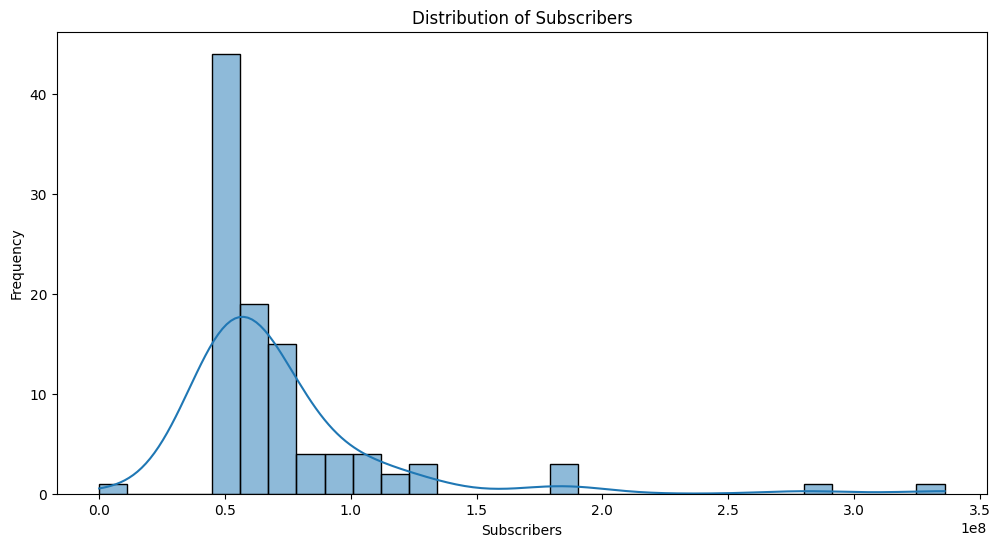

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Subscribers'], bins=30, kde=True)
plt.title("Distribution of Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Frequency")
plt.show()

#Scatter Plot

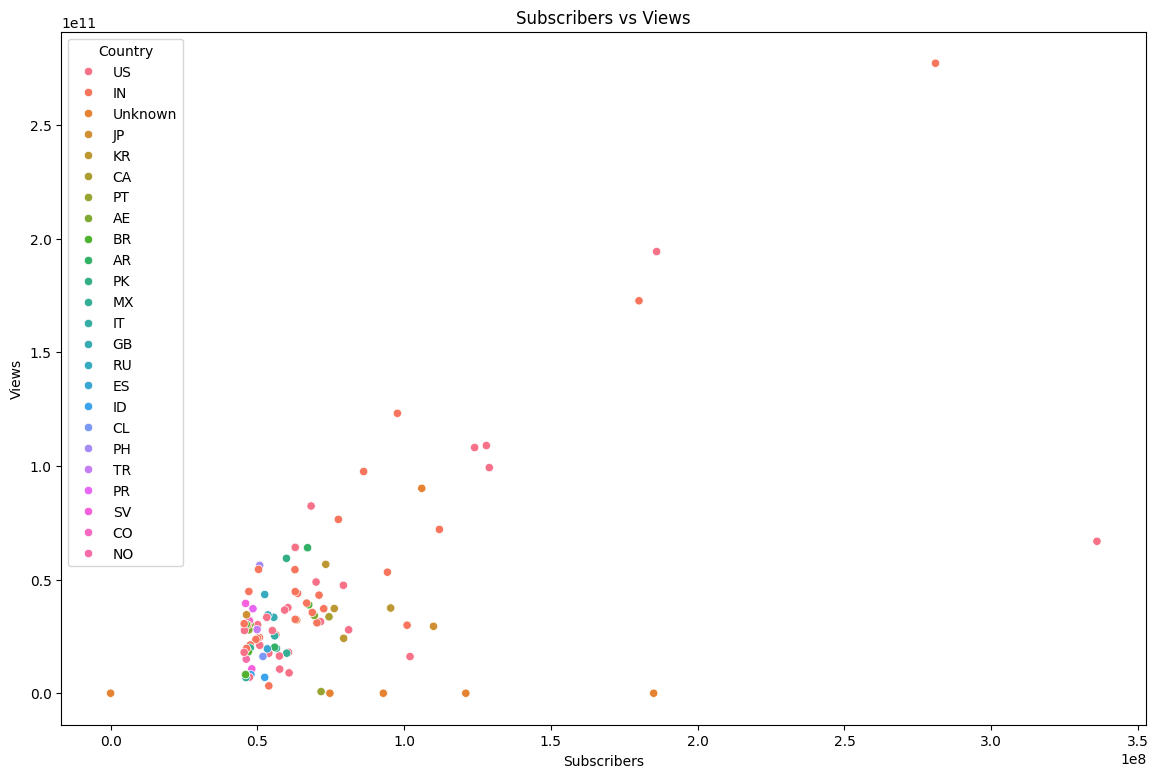

In [17]:
plt.figure(figsize=(14, 9))
sns.scatterplot(data=data, x='Subscribers', y='Views', hue='Country')
plt.title("Subscribers vs Views")
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.legend(title="Country", loc='upper left')
plt.show()

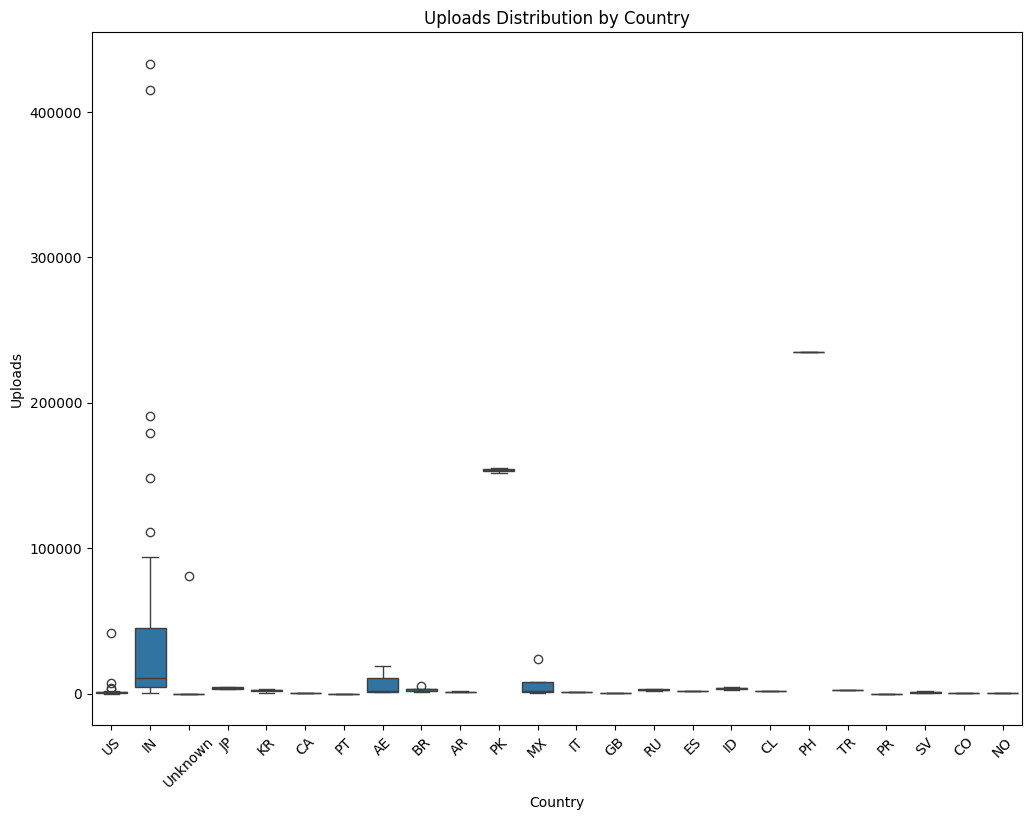

In [19]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=data, x='Country', y='Uploads')
plt.title("Uploads Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Uploads")
plt.xticks(rotation=45)
plt.show()

# Heatmap of Correlation Matrix

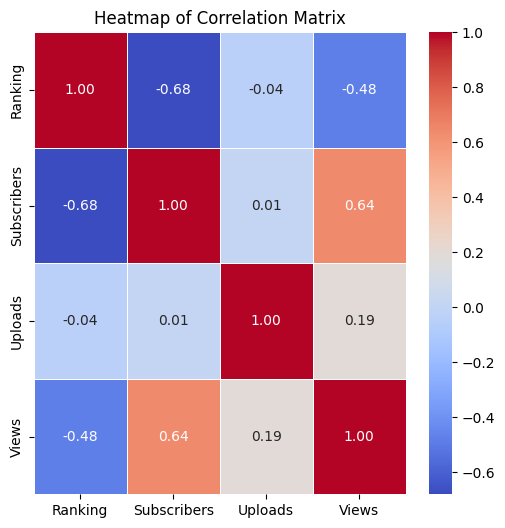

In [23]:
plt.figure(figsize=(6, 6))
correlation_matrix = data[['Ranking', 'Subscribers', 'Uploads', 'Views']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()